# Sample 15arc-sec GEBCO_2023.nc on OM4p25 grid

## Apply edits to the topography.

## Region 19: 25,55,-180,-80,

In [1]:
# Notebook editor: John Krasting

# This notebook originated from Stephen Griffies, with many other contributors:
# Stephen.Griffies
# Alistair.Adcroft
# Robert.Hallberg
# Niki.Zadeh
# Raphael.Dussin

In [2]:
Region_Boundaries = [30,50,-180,-100]
Region_Name = '19: Eastern Pacific / N. America West Coast'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import xarray as xr
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
sys.path.insert(1, './tools/')
from topo_tools import *

Resolution = 240 cells/degree
GEBCO loaded with (nj,ni) =  (43200, 86400)  min(lon) =  -300.0  max(lon) =  60.0


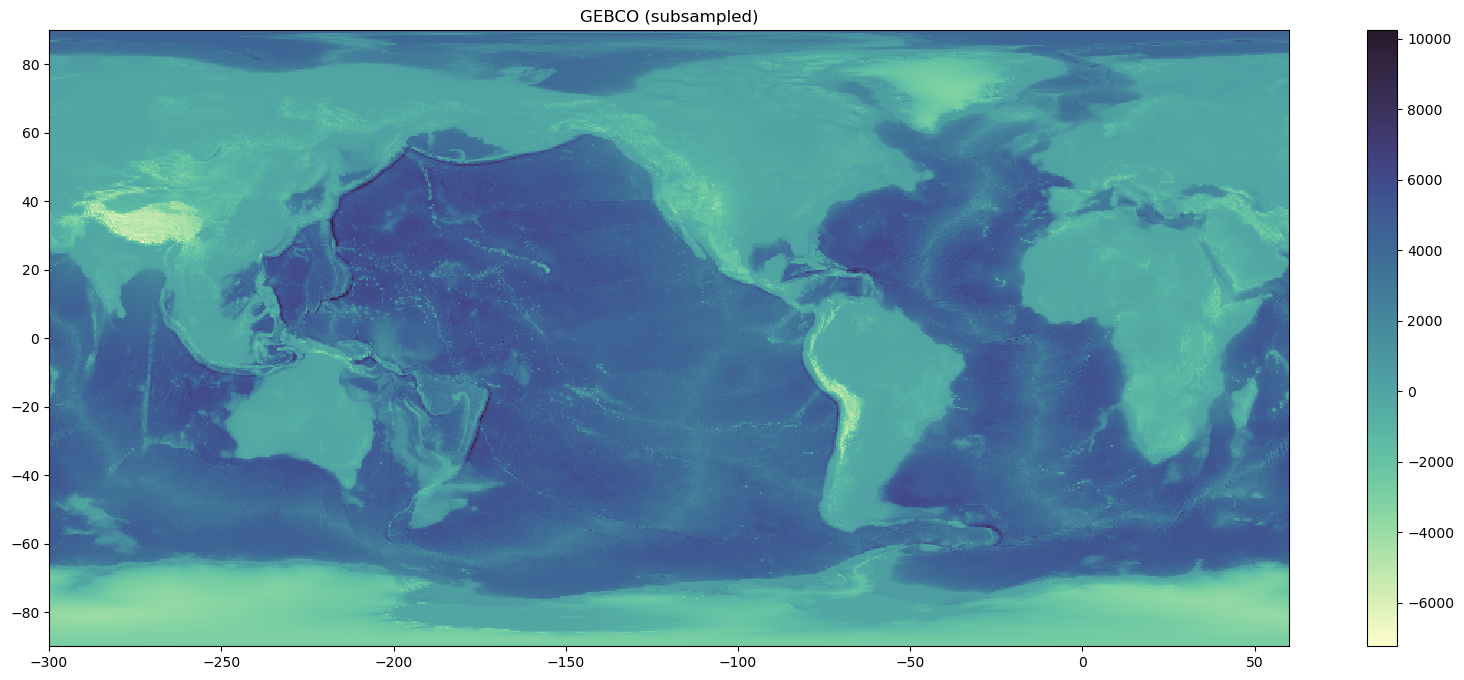

In [4]:
# GEBCO-2020 + Bedmachine combined topography 

fname_gebco  = "/archive/gold/datasets/topography/GEBCO_2023/GEBCO_2023.nc"

GEBCO = GEBCO_data(fname_gebco)

plt.figure(figsize=(20,8))
plt.pcolormesh(GEBCO.lonq[::100], GEBCO.latq[::100], GEBCO.depth[::100,::100], cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('GEBCO (subsampled)');

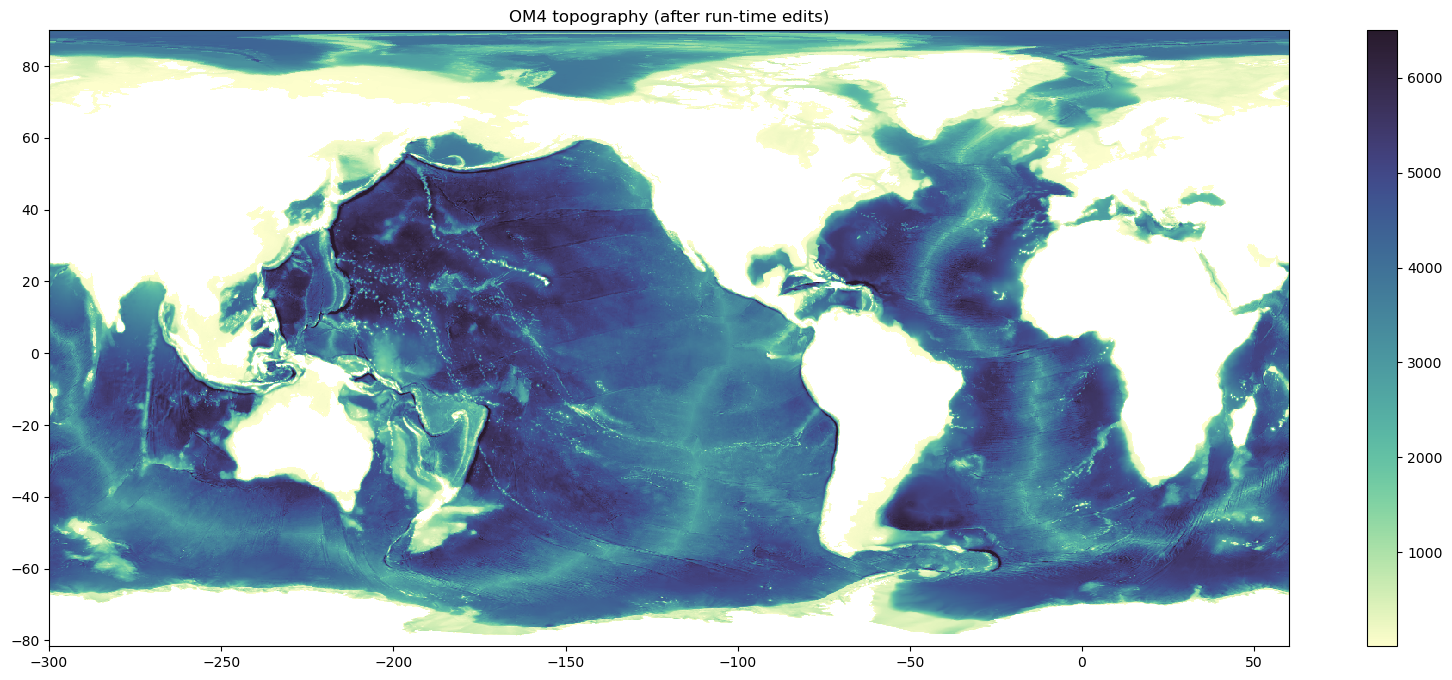

In [5]:
OM4 = OM4_data('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_hgrid.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_static.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_mask.nc')
plt.figure(figsize=(20,8))
plt.pcolormesh(OM4.lonq, OM4.latq, OM4.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM4 topography (after run-time edits)');

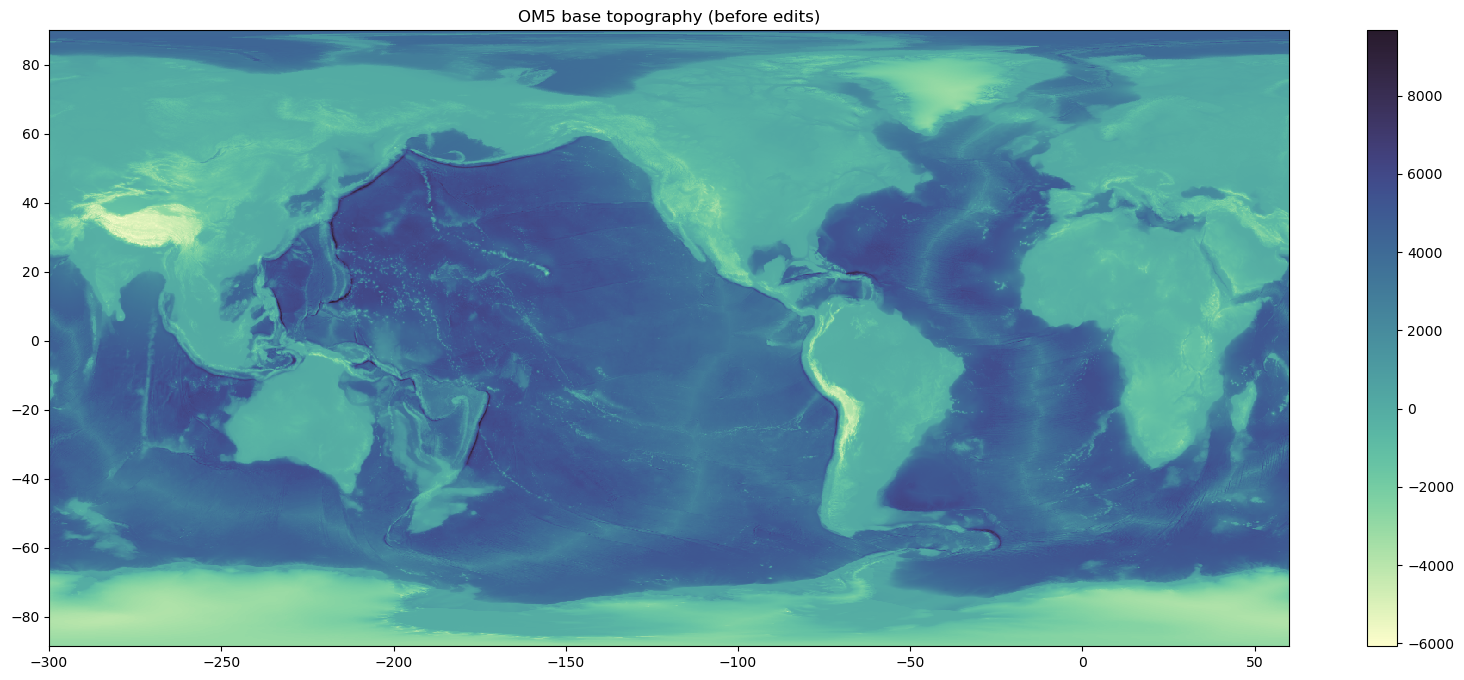

In [6]:
OM5 = OM5_data('ocean_hgrid.nc',
               'regridded_source_topog.nc')

plt.figure(figsize=(20,8))
plt.pcolormesh(OM5.lonq, OM5.latq, OM5.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM5 base topography (before edits)');

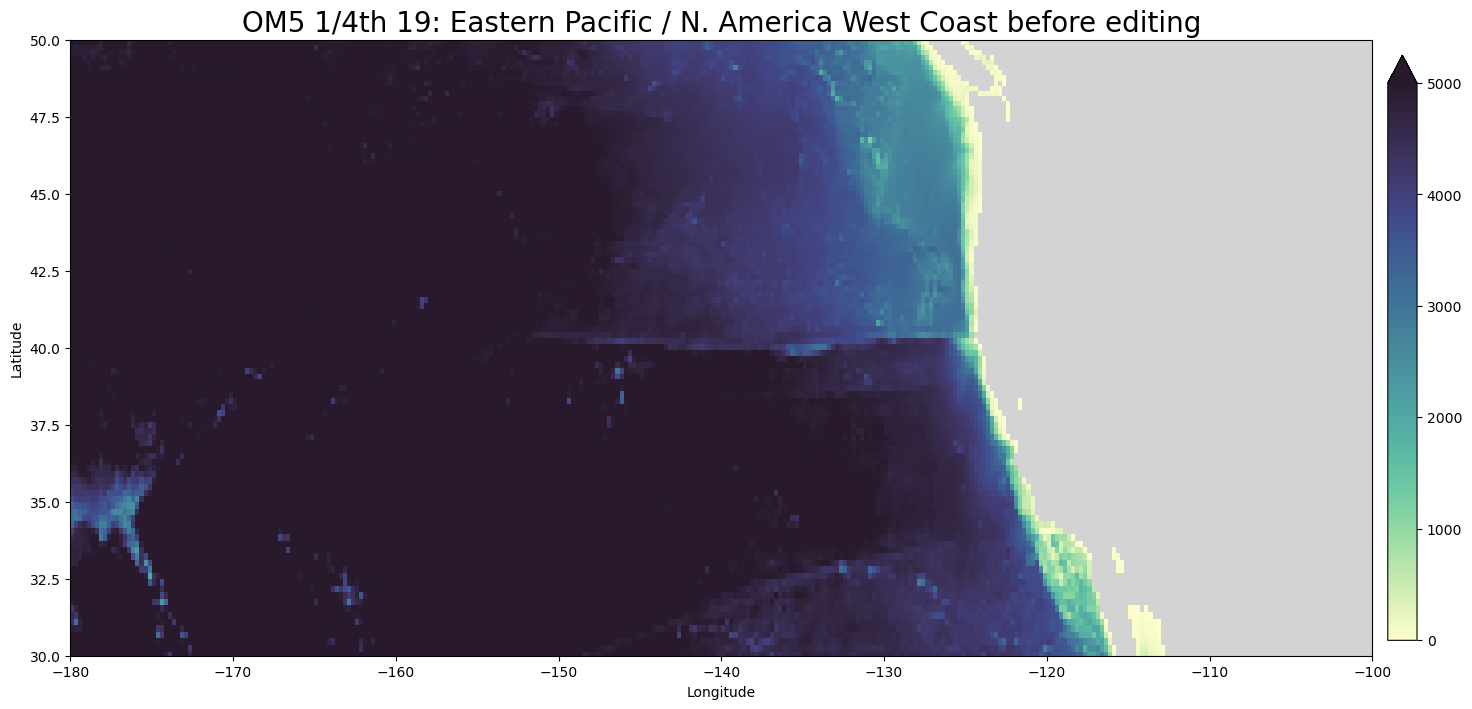

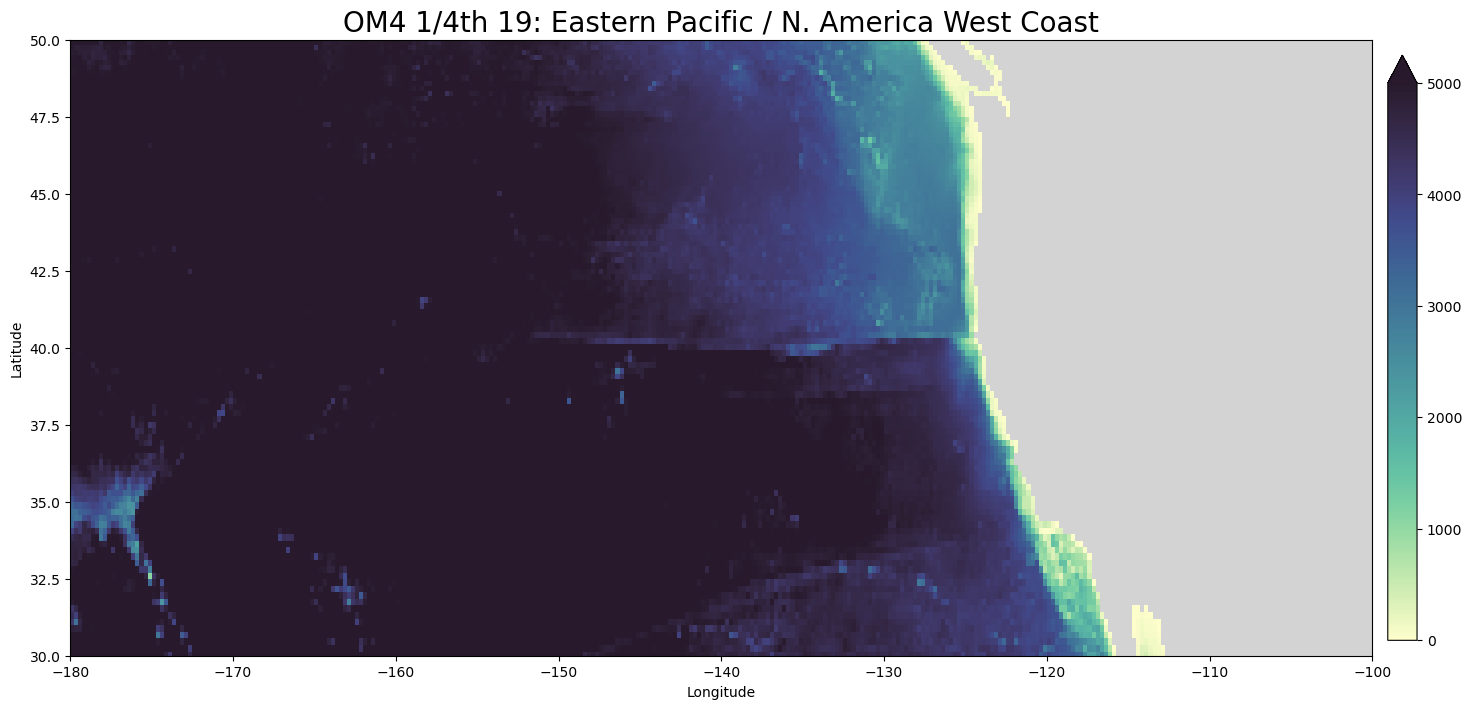

In [7]:
# Broad view of region before edits 

broadview(OM4,OM5,
          (Region_Boundaries[2],Region_Boundaries[3]),
          (Region_Boundaries[0],Region_Boundaries[1]),
          0, 5000, Region_Name, om4=True, new=False)

(-170.0, 20.0)
Gebco (js:je,is:ie) = 28799:31199,28799:33599
OM4 model (js:je,is:ie) = 628:679,478:560
OM5 model (js:je,is:ie) = 709:760,478:560
Using xlim = (-180.0, -160.0) ylim = (30.0, 40.0)
(-170.0, 20.0)
Gebco (js:je,is:ie) = 31199:33599,28799:33599
OM4 model (js:je,is:ie) = 677:736,478:560
OM5 model (js:je,is:ie) = 758:817,478:560
Using xlim = (-180.0, -160.0) ylim = (40.0, 50.0)
(-150.0, 20.0)
Gebco (js:je,is:ie) = 28799:31199,33599:38399
OM4 model (js:je,is:ie) = 628:679,558:640
OM5 model (js:je,is:ie) = 709:760,558:640
Using xlim = (-160.0, -140.0) ylim = (30.0, 40.0)
(-150.0, 20.0)
Gebco (js:je,is:ie) = 31199:33599,33599:38399
OM4 model (js:je,is:ie) = 677:736,558:640
OM5 model (js:je,is:ie) = 758:817,558:640
Using xlim = (-160.0, -140.0) ylim = (40.0, 50.0)
(-130.0, 20.0)
Gebco (js:je,is:ie) = 28799:31199,38399:43199
OM4 model (js:je,is:ie) = 628:679,638:720
OM5 model (js:je,is:ie) = 709:760,638:720
Using xlim = (-140.0, -120.0) ylim = (30.0, 40.0)
(-130.0, 20.0)
Gebco (js:

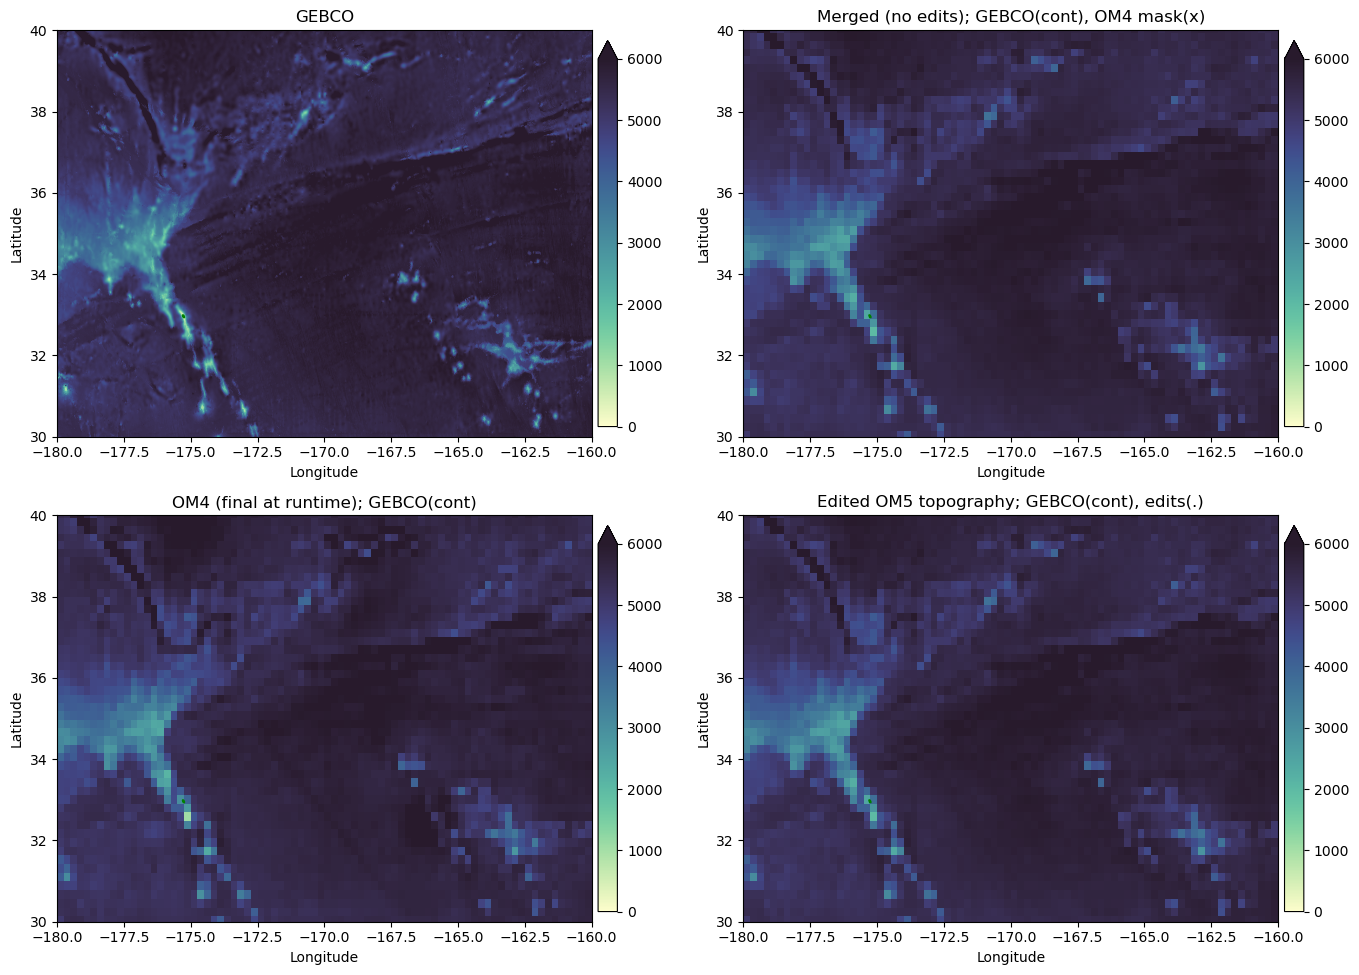

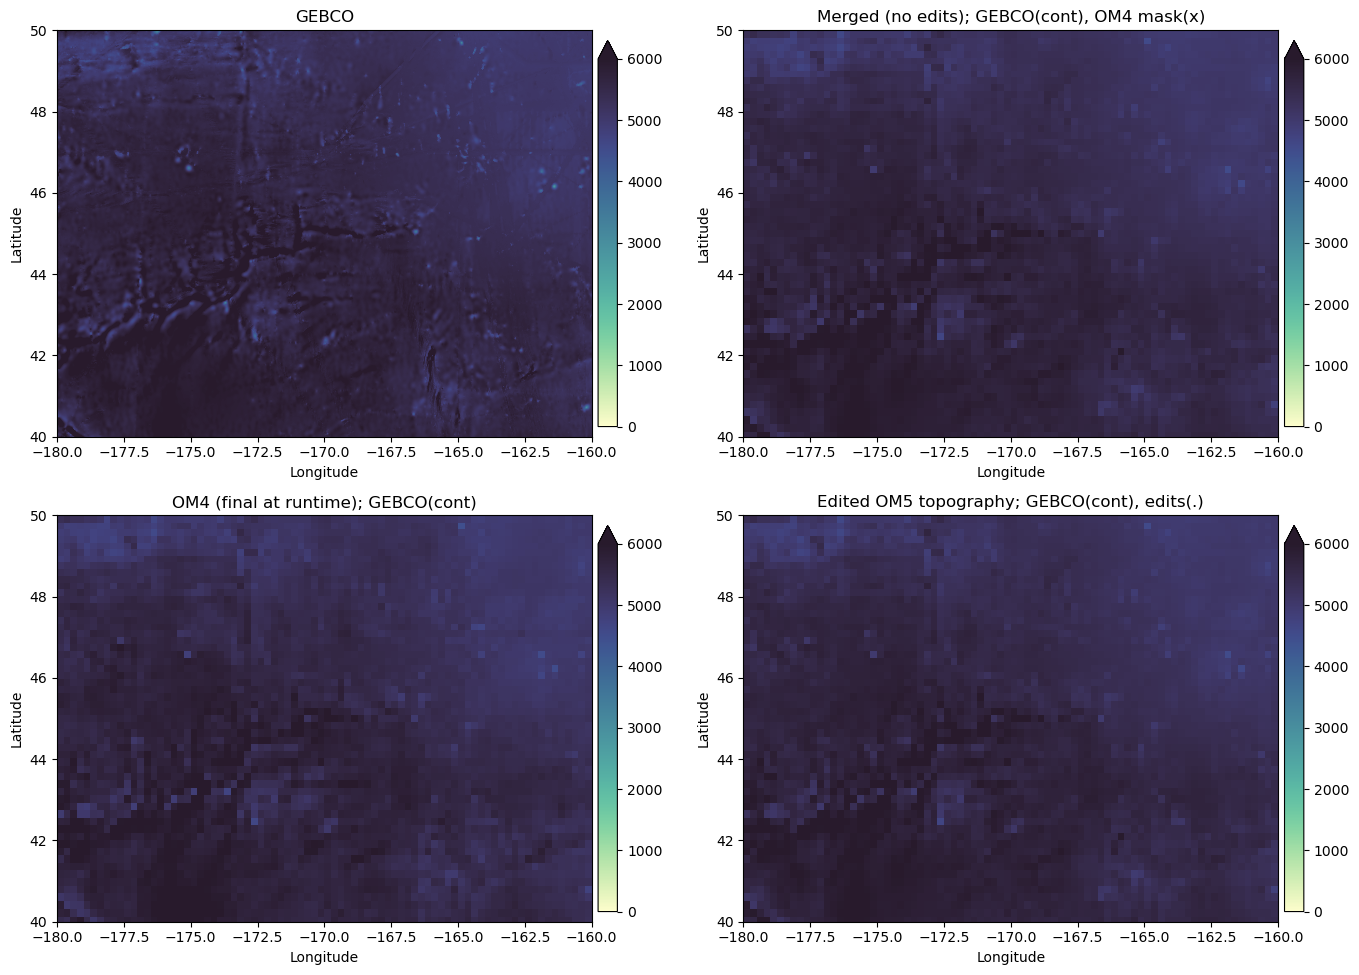

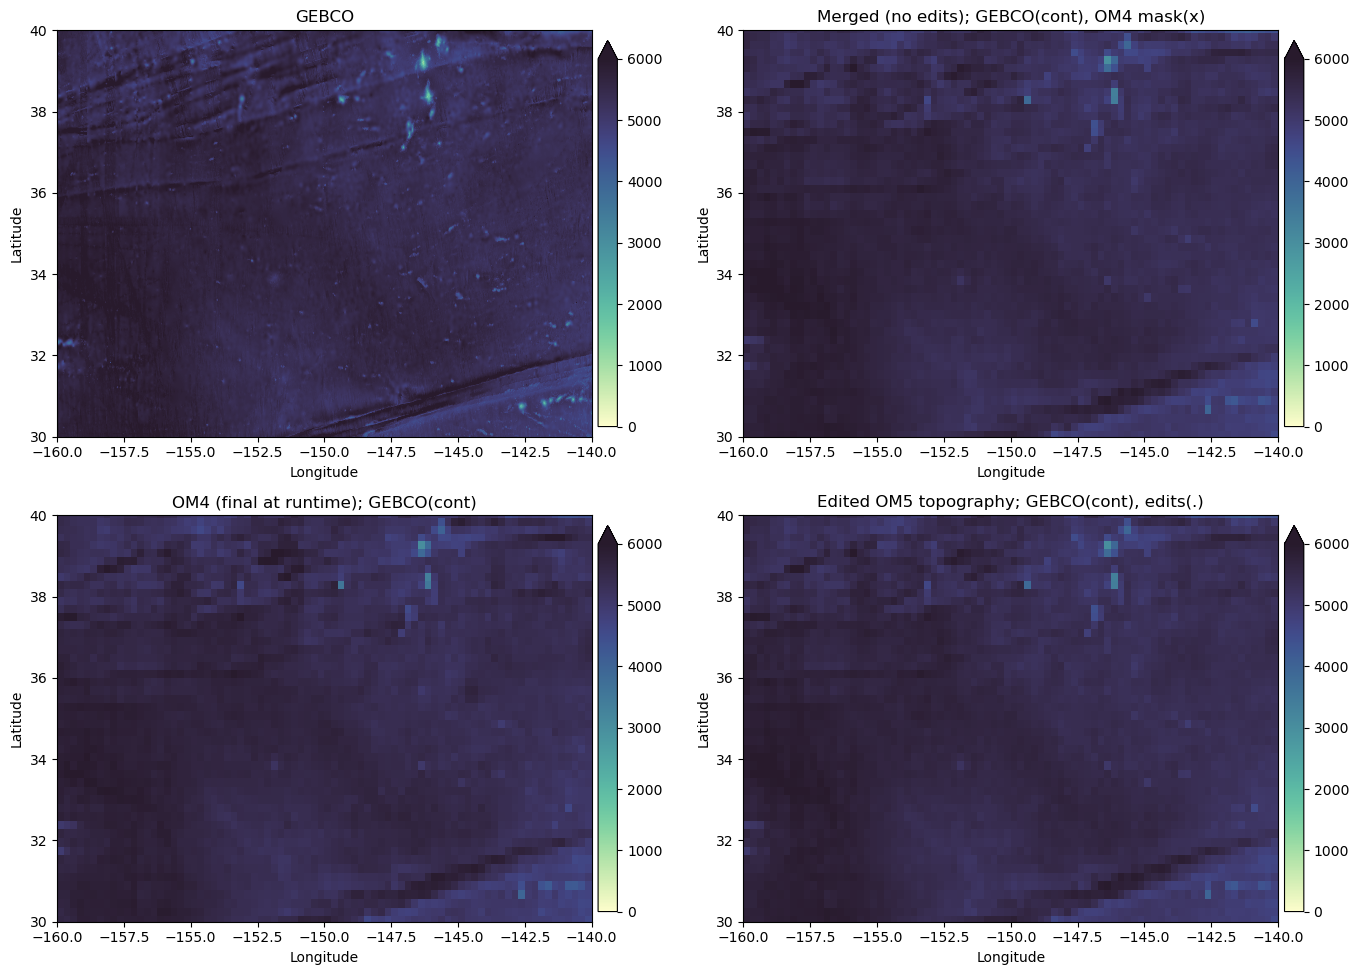

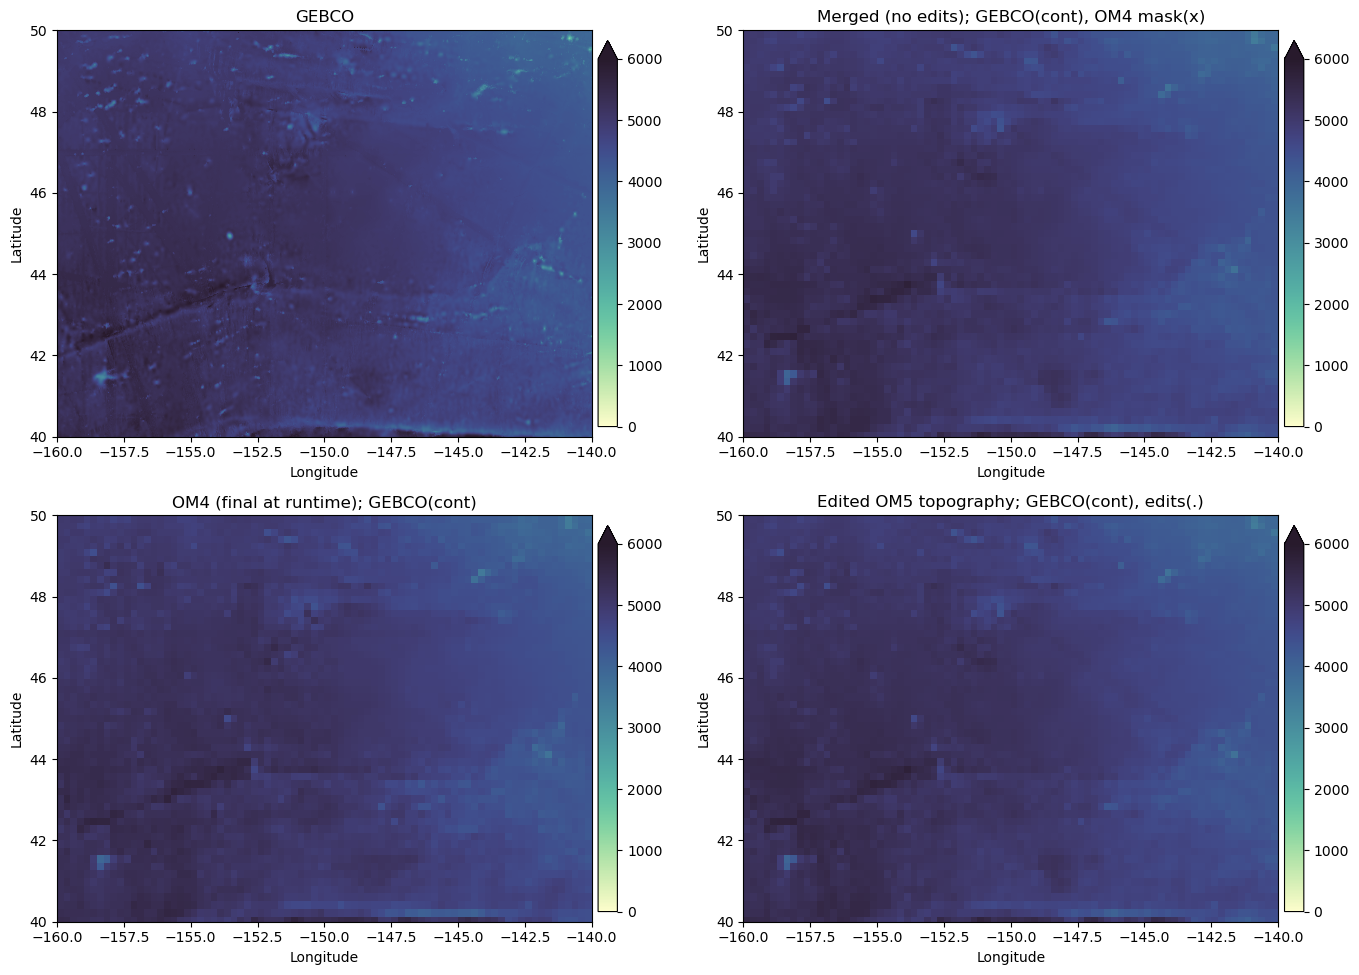

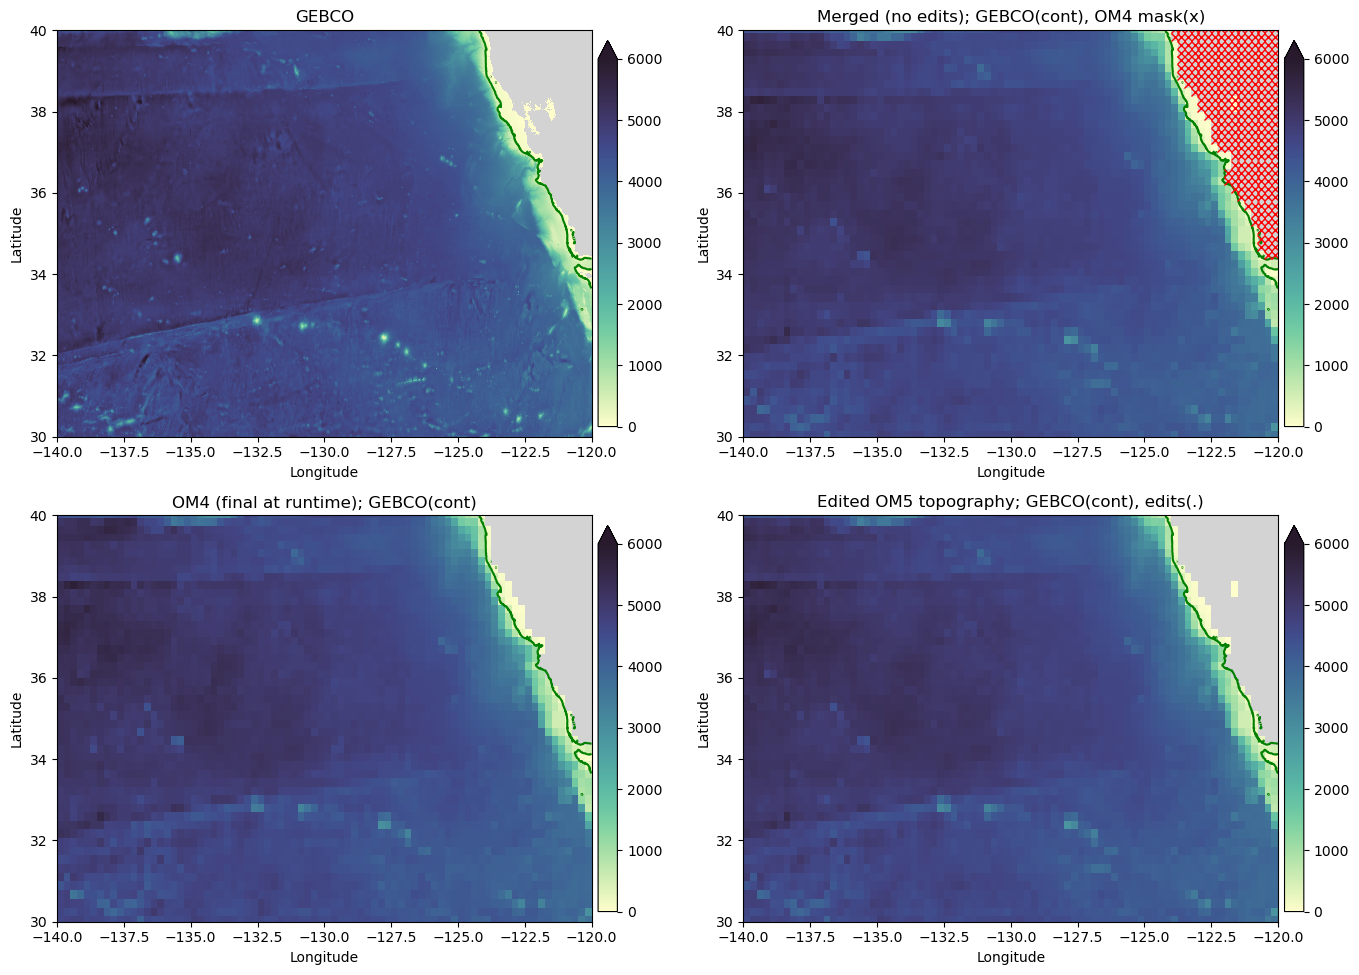

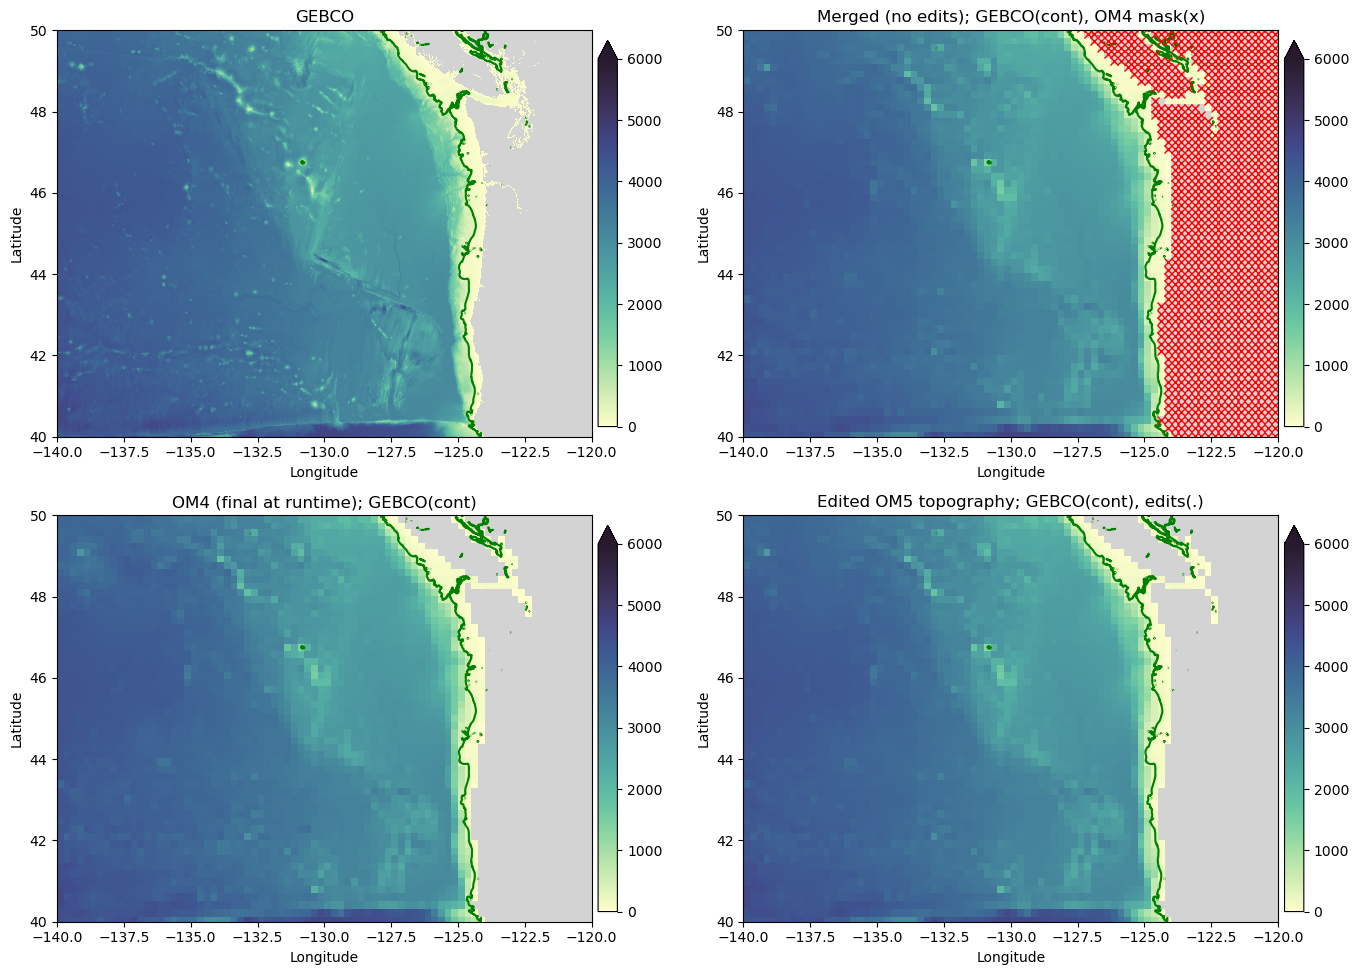

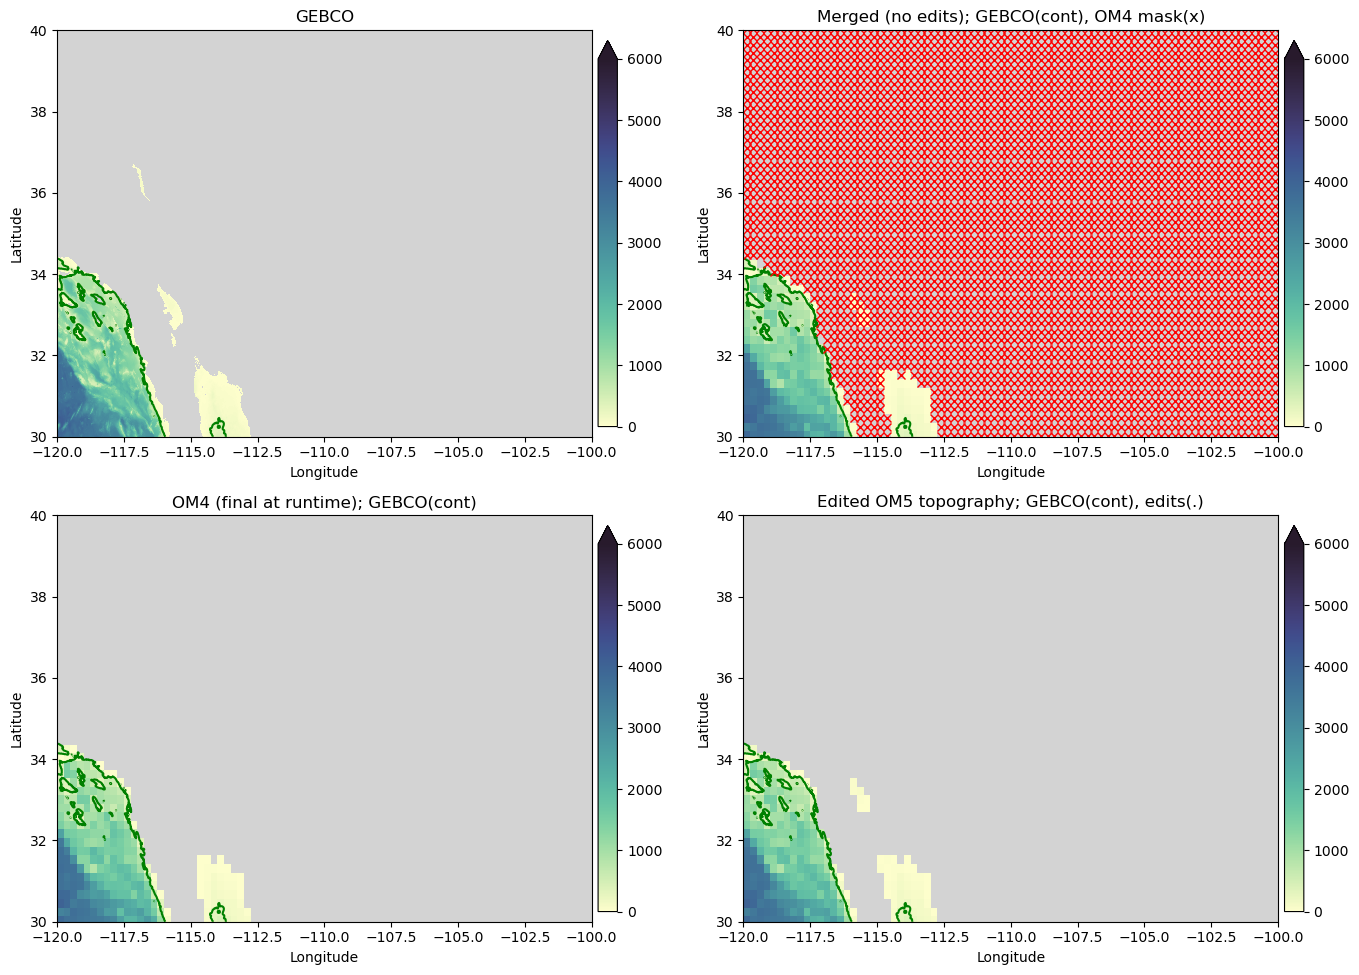

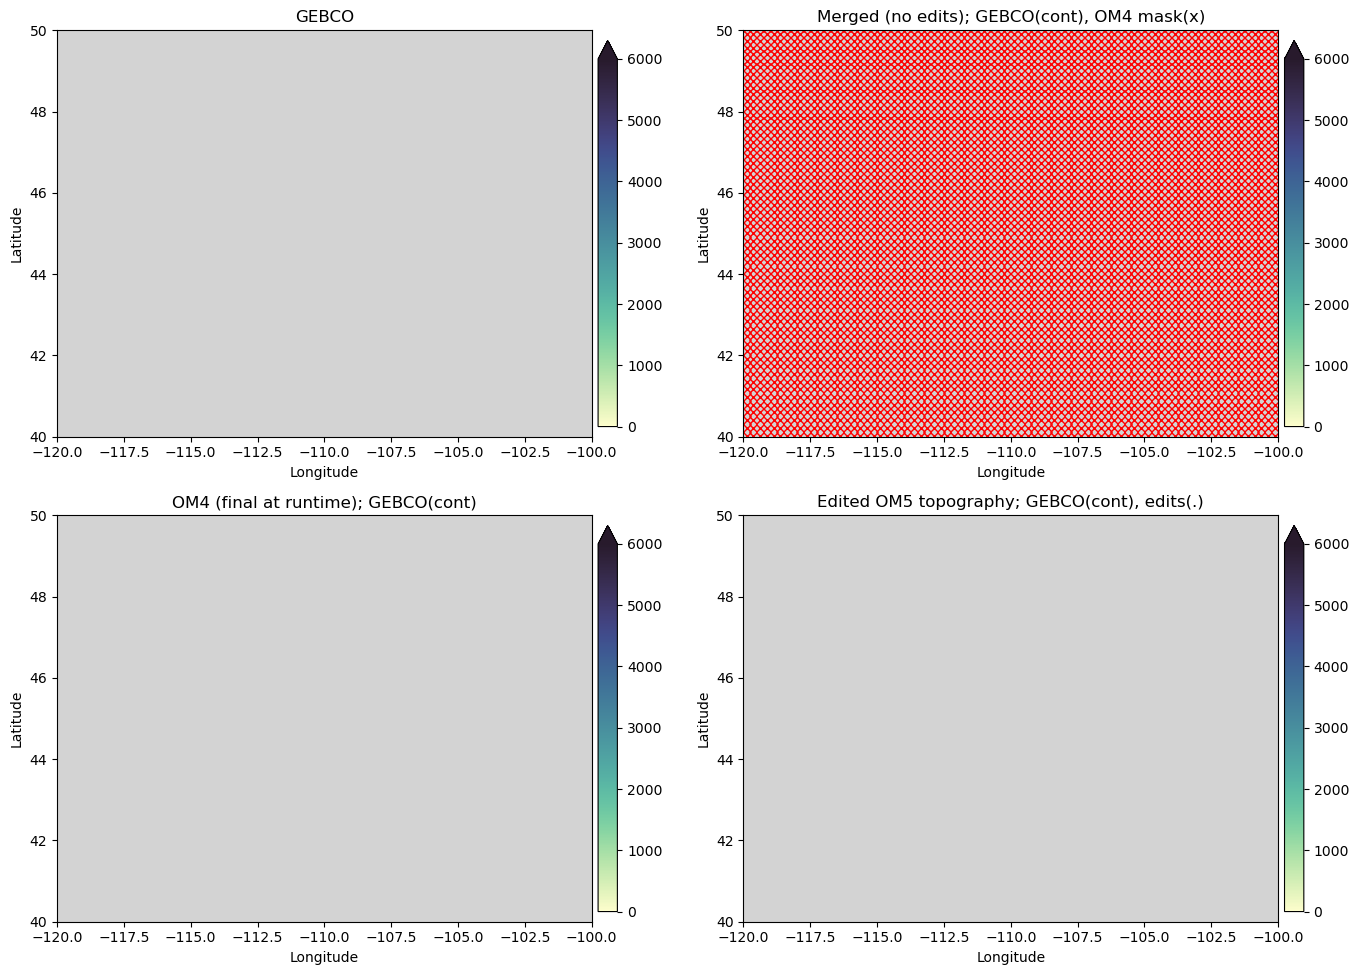

In [8]:
xint = divide_interval(Region_Boundaries[2],Region_Boundaries[3],4)
yint = divide_interval(Region_Boundaries[0],Region_Boundaries[1],2)

depths = [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]

count = 0
for nx,xrng in enumerate(xint):
    for ny, yrng in enumerate(yint):
        print(xrng)
        try:
            region = Region(xrng[0], yrng[0], width_lon=xrng[1], width_lat=yrng[1])
            map_region(region, 0, depths[count], GEBCO, OM4, OM5, '', gebco_contours=[250],text_depths=False)
            count+=1
        except:
            pass

Gebco (js:je,is:ie) = 32928:33408,41819:42779
OM4 model (js:je,is:ie) = 717:731,695:713
OM5 model (js:je,is:ie) = 798:812,695:713
Using xlim = (-125.75, -121.75) ylim = (47.2, 49.2)


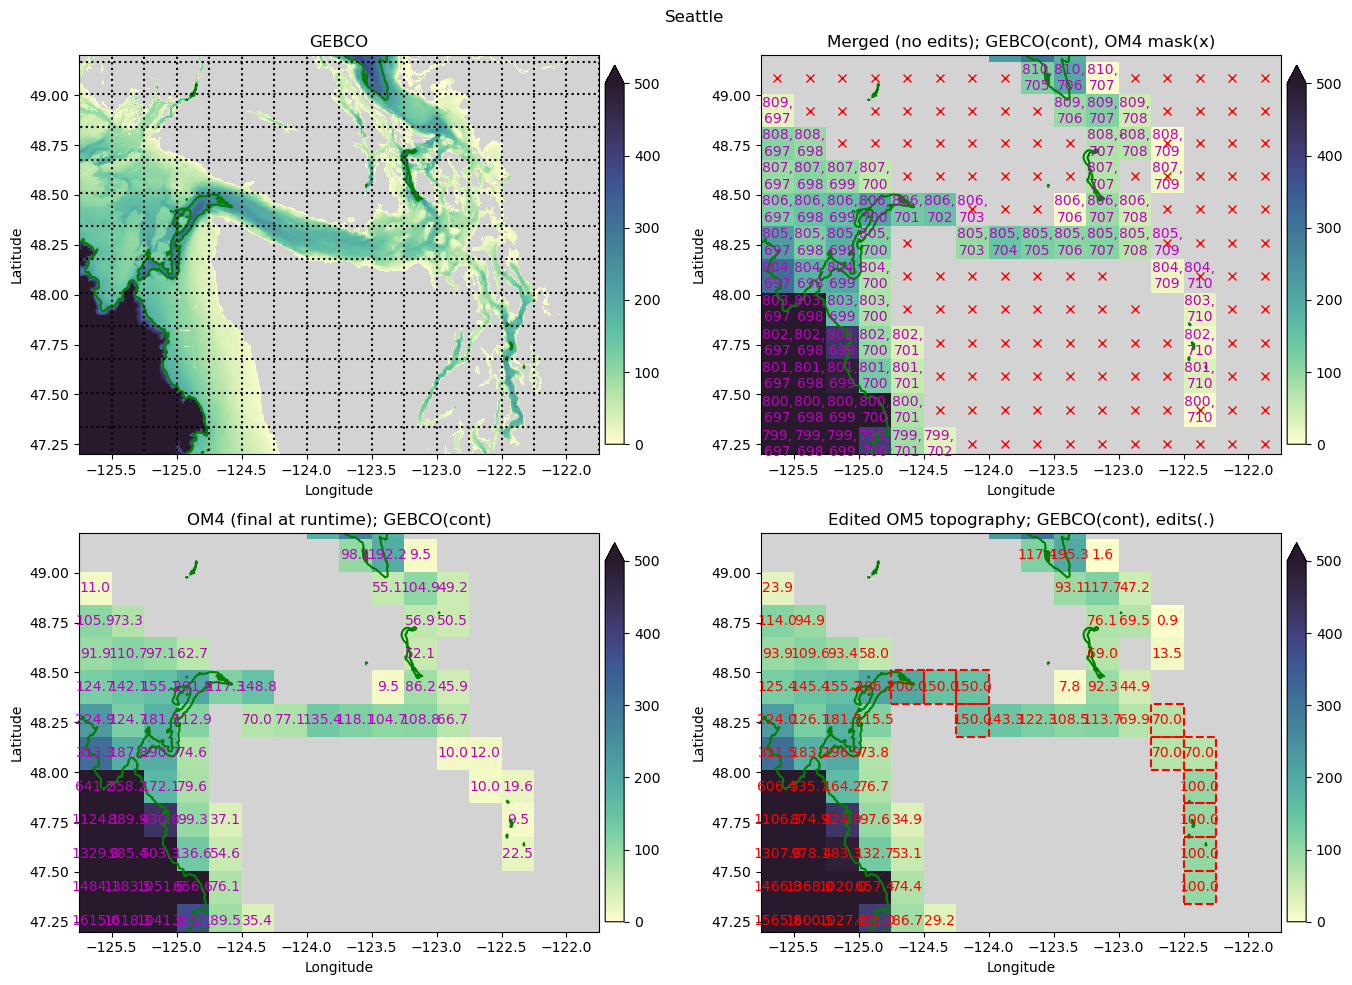

In [9]:
# Check Seattle

region = Region(-123.75, 48.2, width_lon=4, width_lat=2.0)

OM5.reset(region)
OM5.depth[806,701] = 200.
OM5.depth[806,702] = 150.
OM5.depth[806,703] = 150.
OM5.depth[805,703] = 150.

OM5.depth[805,709] = 70
OM5.depth[804,709] = 70
OM5.depth[804,710] = 70
OM5.depth[803,710] = 100
OM5.depth[802,710] = 100
OM5.depth[801,710] = 100
OM5.depth[800,710] = 100

map_region(region, 0, 500, GEBCO, OM4, OM5, 'Seattle', gebco_contours=[250] )

Gebco (js:je,is:ie) = 30252:31044,42263:42983
OM4 model (js:je,is:ie) = 657:675,703:717
OM5 model (js:je,is:ie) = 738:756,703:717
Using xlim = (-123.9, -120.9) ylim = (36.050000000000004, 39.35)


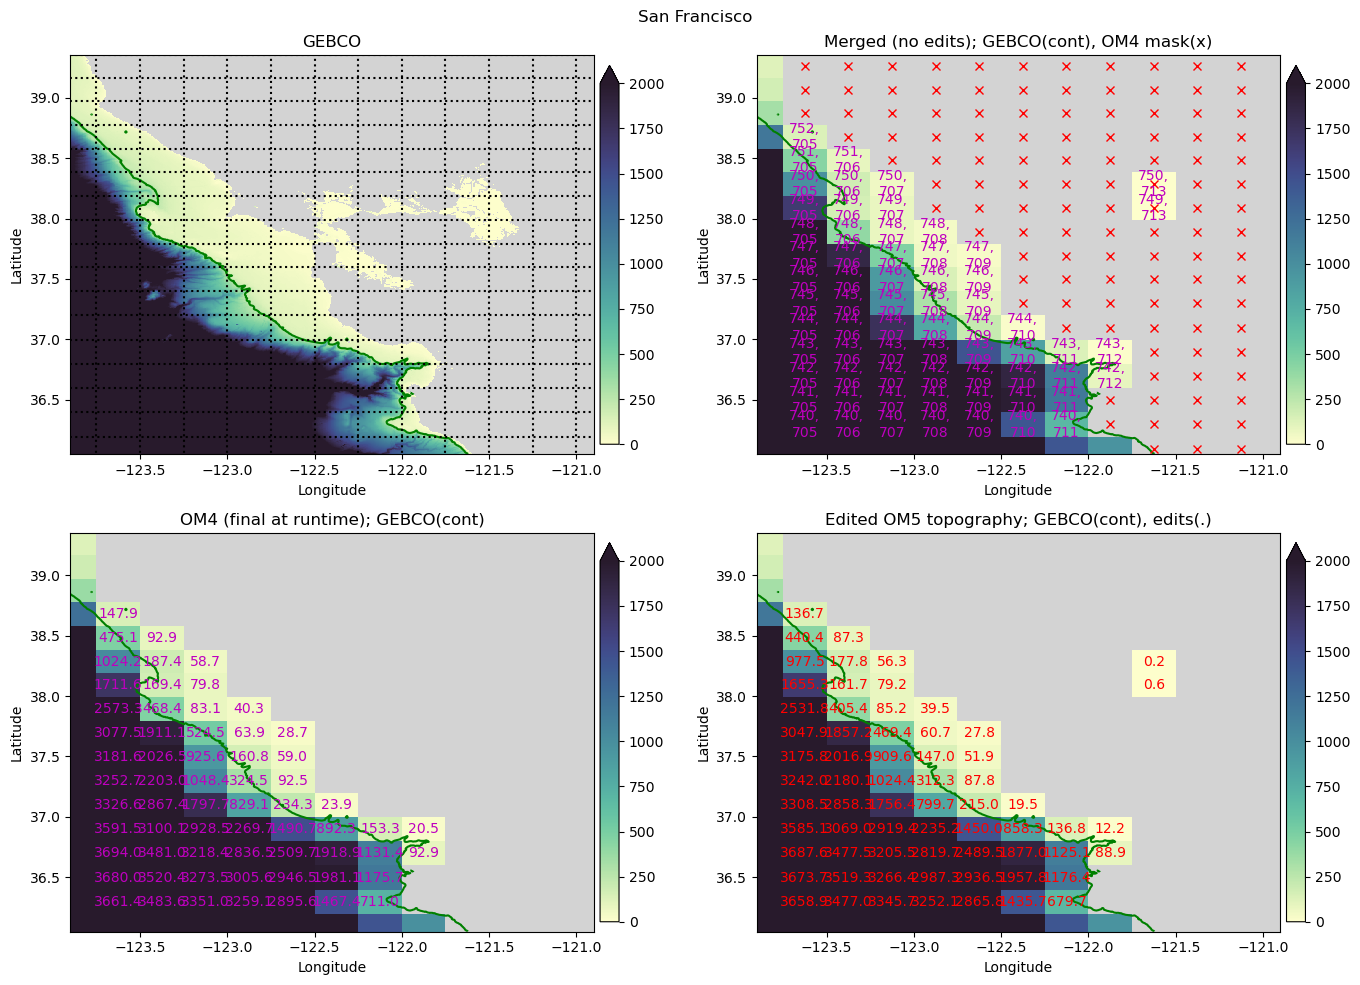

In [10]:
# Check San Francisco (no edits)

region = Region(-122.4, 37.7, width_lon=3, width_lat=3.3)
map_region(region, 0, 2000, GEBCO, OM4, OM5, 'San Francisco', gebco_contours=[250] )

Gebco (js:je,is:ie) = 28199:29399,44279:44999
OM4 model (js:je,is:ie) = 616:642,736:750
OM5 model (js:je,is:ie) = 697:723,736:750
Using xlim = (-115.5, -112.5) ylim = (27.5, 32.5)


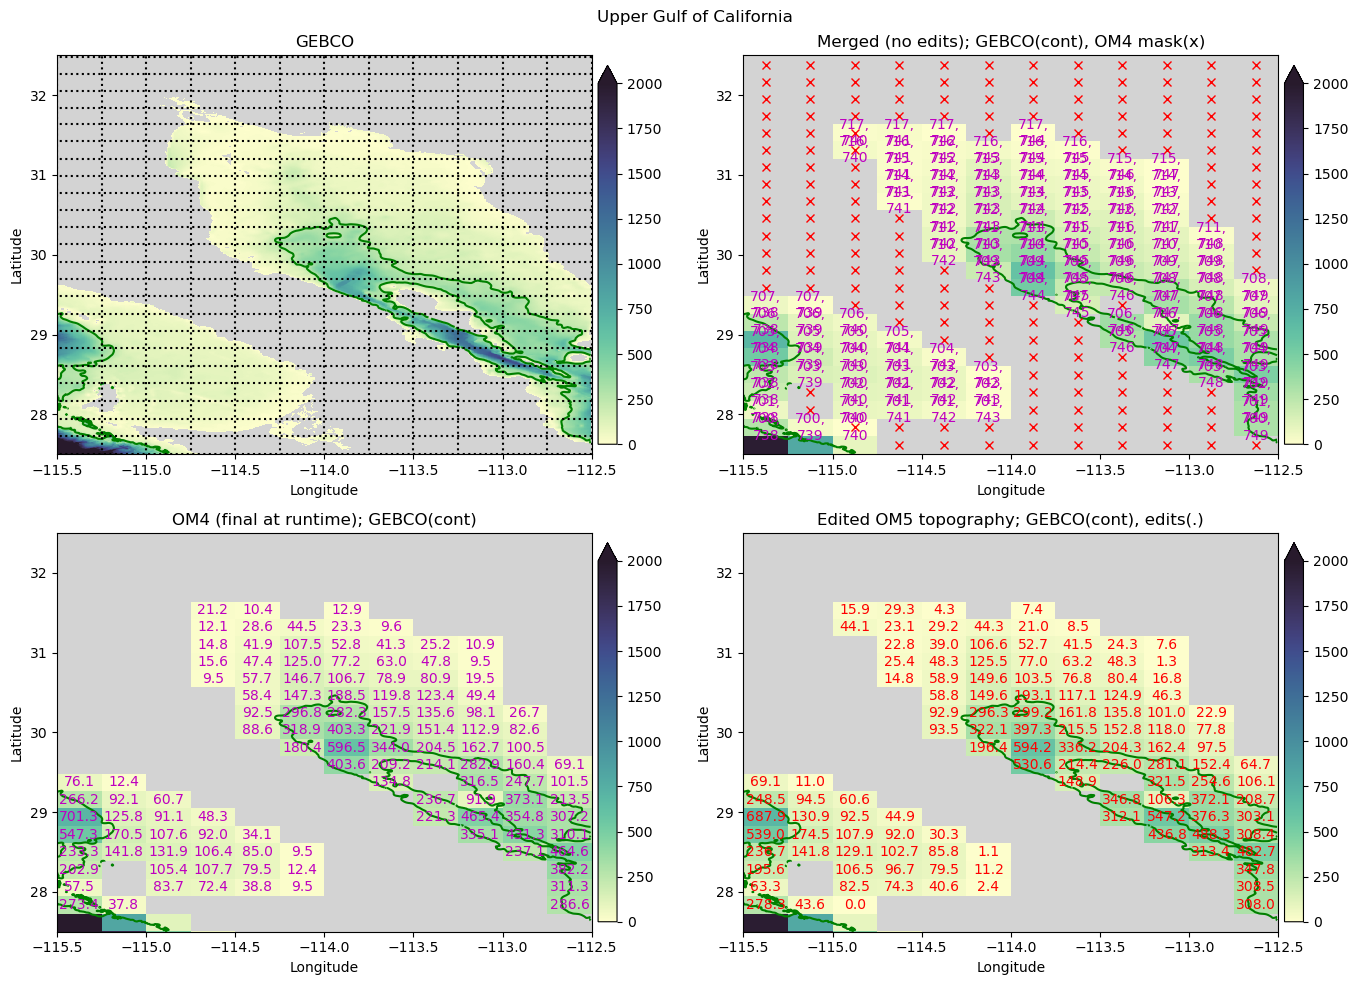

In [11]:
# Check Upper Gulf of California (no edits)

region = Region(-114, 30.0, width_lon=3, width_lat=5)
map_region(region, 0, 2000, GEBCO, OM4, OM5, 'Upper Gulf of California', gebco_contours=[250] )

In [12]:
OM5.write_nc("om5_topo_edits_region_19.nc")

New Depth at jEdit=800 iEdit=710 set to 100.0
New Depth at jEdit=801 iEdit=710 set to 100.0
New Depth at jEdit=802 iEdit=710 set to 100.0
New Depth at jEdit=803 iEdit=710 set to 100.0
New Depth at jEdit=804 iEdit=709 set to 70.0
New Depth at jEdit=804 iEdit=710 set to 70.0
New Depth at jEdit=805 iEdit=703 set to 150.0
New Depth at jEdit=805 iEdit=709 set to 70.0
New Depth at jEdit=806 iEdit=701 set to 200.0
New Depth at jEdit=806 iEdit=702 set to 150.0
New Depth at jEdit=806 iEdit=703 set to 150.0
NetCDF file 'om5_topo_edits_region_19.nc' written successfully.
